# GLISTER Experiments

Table of Contents:
1. Experiments on `DNA`
    - Data
    - Model: TwoLayerNet()
    - Glister:
        - GlisterNaive
        - GlisterStochasticReg
        - GlisterStochasticNoReg
    - Model trained on Glister subsets:
        - GlisterNaive
        - GlisterStochasticReg
        - GlisterStochasticNoReg
    - Model trained on full train
    - Random predictions
    - Save
    - Plots
    
2. Experiments on `Digits`
    - Data
    - Model: MnistNet()
    - GlisterImage
    - Model trained on Glister subsets
    - Model trained on full train
    - Random predictions
    - Save
    - Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.utils.data as torch_data
from torch.utils.data import DataLoader

from train import train


## Experiments on `DNA`

In [3]:
from GlisterRegular.GlisterNaive import GlisterNaive
from GlisterRegular.GlisterStochastic import GlisterStochasticReg, GlisterStochasticNoReg

In [4]:
torch.manual_seed(42)
np.random.seed(42)

### Data

In [19]:
class DNA_DATA(torch_data.Dataset):
    
    def __init__(self, X, y):
        super(DNA_DATA, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) 
    
    def __len__(self):
        return list(self.X.size())[0]
    
    def __getitem__(self, idx):
        return (self.X[idx, :], self.y[idx])

In [32]:
data = pd.read_csv('dna.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis = 1), data['class'], test_size = 0.3)
y_train = y_train - 1
y_test = y_test - 1

In [33]:
fullset = DNA_DATA(np.array(X_train), np.array(y_train))
valset = DNA_DATA(np.array(X_train), np.array(y_train))
testset = DNA_DATA(np.array(X_test), np.array(y_test))

### Model

In [34]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(180, 20)
        self.linear2 = torch.nn.Linear(20, 3)
    
    def forward(self, x, last=False):
        l1scores = torch.nn.functional.relu(self.linear1(x))
        scores = self.linear2(l1scores)
        if last:
            return scores, l1scores
        else:
            return scores

### GlisterNaive

In [35]:
glister_naive_acc = []
glister_naive_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister_naive = GlisterNaive(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 3,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_naive.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_naive_acc.append(tst_acc)
    glister_naive_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 1.0828784704208374 110.21994364261627 5.44965386390686
selEpoch: 0, Starting Selection: 2021-03-19 19:41:54.136524
numSelected: 0 Time for 1: 0.007116794586181641
selEpoch: 0, Selection Ended at: 2021-03-19 19:41:54.260361
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 11.89426851272583 106.0469062924385 5.19478714466095
selEpoch: 1, Starting Selection: 2021-03-19 19:41:54.320800


/content/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


numSelected: 0 Time for 1: 0.003361940383911133
selEpoch: 1, Selection Ended at: 2021-03-19 19:41:54.455247
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 11.286416351795197 103.22926127910614 5.04783970117569
selEpoch: 2, Starting Selection: 2021-03-19 19:41:54.510959
numSelected: 0 Time for 1: 0.003490924835205078
selEpoch: 2, Selection Ended at: 2021-03-19 19:41:54.640494
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 11.255531966686249 101.53398948907852 4.949522137641907
selEpoch: 3, Starting Selection: 2021-03-19 19:41:54.692501
numSelected: 0 Time for 1: 0.0036308765411376953
selEpoch: 3, Selection Ended at: 2021-03-19 19:41:54.817782
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 10.83122855424881 99.58347189426422 4.800527036190033
selEpoch: 4, Starting Selection: 2021-03-19 19:41:54.873601
numSelected: 0 Time for 1: 0.0032317638397216797
selEpoch: 4, Selection Ended at: 2021-03-19 19:41:54.990754
Epoch: 6 SubsetTrn,FullTrn,ValLoss: 10.610350847244263 97.36486208438873 4.723958969116211
selEpoch: 5, Starting 

### GlisterStochasticReg

In [36]:
glister_stoch_reg_acc = []
glister_stoch_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 3,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_reg_acc.append(tst_acc)
    glister_stoch_reg_indexes.append(idxs)

/content/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


numSelected: 0 Time for 1: 0.0032432079315185547
numSelected: 0 Time for 1: 0.003670215606689453
numSelected: 0 Time for 1: 0.003275156021118164
numSelected: 0 Time for 1: 0.0031731128692626953
numSelected: 0 Time for 1: 0.00597381591796875
numSelected: 0 Time for 1: 0.0034584999084472656
numSelected: 0 Time for 1: 0.0031714439392089844
numSelected: 0 Time for 1: 0.0036115646362304688
numSelected: 0 Time for 1: 0.003339052200317383
numSelected: 0 Time for 1: 0.0034401416778564453
numSelected: 0 Time for 1: 0.0033893585205078125
numSelected: 0 Time for 1: 0.003430604934692383
numSelected: 0 Time for 1: 0.003532886505126953
numSelected: 0 Time for 1: 0.003149747848510742
numSelected: 0 Time for 1: 0.003632783889770508
numSelected: 0 Time for 1: 0.0036423206329345703
numSelected: 0 Time for 1: 0.003142118453979492
numSelected: 0 Time for 1: 0.003095865249633789
numSelected: 0 Time for 1: 0.003074169158935547
numSelected: 0 Time for 1: 0.0037391185760498047
numSelected: 0 Time for 1: 0.005

In [37]:
glister_stoch_no_reg_acc = []
glister_stoch_no_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticNoReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 3,
    n_channels = 1,
    bud = int(k * len(fullset)))
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_no_reg_acc.append(tst_acc)
    glister_stoch_no_reg_indexes.append(idxs)

numSelected: 0 Time for 1: 0.0015740394592285156


/content/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


numSelected: 100 Time for 1: 0.0011823177337646484
numSelected: 200 Time for 1: 0.0012824535369873047
numSelected: 0 Time for 1: 0.002720355987548828
numSelected: 100 Time for 1: 0.001291036605834961
numSelected: 200 Time for 1: 0.0011792182922363281
numSelected: 0 Time for 1: 0.0013968944549560547
numSelected: 100 Time for 1: 0.0014493465423583984
numSelected: 200 Time for 1: 0.0011186599731445312
numSelected: 0 Time for 1: 0.0016257762908935547
numSelected: 100 Time for 1: 0.00231170654296875
numSelected: 200 Time for 1: 0.0013532638549804688
numSelected: 0 Time for 1: 0.0015478134155273438
numSelected: 100 Time for 1: 0.001417398452758789
numSelected: 200 Time for 1: 0.0014150142669677734
numSelected: 0 Time for 1: 0.00142669677734375
numSelected: 100 Time for 1: 0.0012078285217285156
numSelected: 200 Time for 1: 0.0012443065643310547
numSelected: 0 Time for 1: 0.0017778873443603516
numSelected: 100 Time for 1: 0.0013566017150878906
numSelected: 200 Time for 1: 0.001275777816772461


### Model trained on Glister subsets

#### Glister Naive

In [38]:
glister_naive_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(np.array(X_train.iloc[ind]), np.array(y_train.iloc[ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_naive_subsets_test_acc.append(accuracy_score(y_test, y_pred))

In [39]:
glister_stoch_reg_subsets_test_acc = []

for ind in glister_stoch_reg_indexes:
    fullset = DNA_DATA(np.array(X_train.iloc[ind]), np.array(y_train.iloc[ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_reg_subsets_test_acc.append(accuracy_score(y_test, y_pred))

In [40]:
glister_stoch_no_reg_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(np.array(X_train.iloc[ind]), np.array(y_train.iloc[ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_no_reg_subsets_test_acc.append(accuracy_score(y_test, y_pred))

### Model trained on Full Train

In [41]:
full_train_acc = []

fullset = DNA_DATA(np.array(X_train), np.array(y_train))
testset = DNA_DATA(np.array(X_test), np.array(y_test))

model = TwoLayerNet()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

full_train_acc.append(accuracy_score(y_test, y_pred))

### Model trained on random subsets

In [42]:
random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(X_train.shape[0]), size = int(k * X_train.shape[0]), replace = False)
    fullset = DNA_DATA(np.array(X_train.iloc[rand_ind]), np.array(y_train.iloc[rand_ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    random_subsets_acc.append(accuracy_score(y_test, y_pred))

### Random predictions

In [43]:
rand_pred_test_acc = accuracy_score(y_test, np.random.choice(np.arange(3), size = len(y_test), replace = True))

### Plot

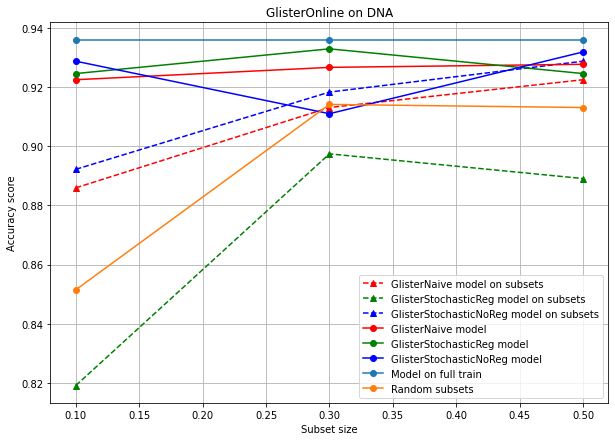

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], glister_naive_subsets_test_acc, label = 'GlisterNaive model on subsets', linestyle = "--", color = "red", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_subsets_test_acc, label = 'GlisterStochasticReg model on subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_subsets_test_acc, label = 'GlisterStochasticNoReg model on subsets', linestyle = "--", color = "blue", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_naive_acc, label = 'GlisterNaive model', color = "red", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_acc, label = 'GlisterStochasticReg model', color = "green", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_acc, label = 'GlisterStochasticNoReg model', color = "blue", marker = "o")
ax.plot([0.1, 0.3, 0.5], [full_train_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], random_subsets_acc, label = 'Random subsets', marker = "o")
#ax.plot([0.1, 0.3, 0.5], [rand_pred_test_acc] * 3, label = 'Random predictions')
plt.grid()
plt.title('GlisterOnline on DNA')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

### Save

In [104]:
data = np.array([glister_naive_subsets_test_acc, glister_stoch_reg_subsets_test_acc, glister_stoch_no_reg_subsets_test_acc, glister_naive_acc, glister_stoch_reg_acc, glister_stoch_no_reg_acc, [full_train_acc[0]]*3, random_subsets_acc])
labels = ['GlisterNaive model on subsets', 'GlisterStochasticReg model on subsets', 'GlisterStochasticNoReg model on subsets', 'GlisterNaive model', 'GlisterStochasticReg model', 'GlisterStochasticNoReg model', 'Model on full train', 'Random subsets']

In [109]:
data = pd.DataFrame(data, index=labels)
data.to_csv("acc_dna", header=None)

In [86]:
np.savetxt('acc_dna.out', data, delimiter=',') 

## Experiments on `Digits`

In [25]:
from GlisterImage.GlisterImage import GlisterOnlineImage

In [26]:
torch.manual_seed(42)
np.random.seed(42)

### Data

In [27]:
class DIGITS_DATA(torch_data.Dataset):
    
    def __init__(self, X, y):
        super(DIGITS_DATA, self).__init__()
        X = X.reshape(-1, 8, 8)
        X = np.expand_dims(X, 1)
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) 
    
    def __len__(self):
        return list(self.X.size())[0]
    
    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])

In [17]:
from sklearn.datasets import load_digits

digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

In [30]:
fullset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
valset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

### Model

In [35]:
class MnistNet(torch.nn.Module):
    def __init__(self):
        super(MnistNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, 1)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = torch.nn.Dropout2d(0.25)
        self.dropout2 = torch.nn.Dropout2d(0.5)
        self.fc1 = torch.nn.Linear(256, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = torch.nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout2(x)
        output = self.fc2(x)
        return output

### GlisterImage (GlisterNaive for images)

In [36]:
glister_image_acc = []
glister_image_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister_image = GlisterOnlineImage(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.3,
    trn_batch_size = 20,
    val_batch_size = 20,
    tst_batch_size = 20,
    dss_batch_size = 20,
    model = MnistNet(),
    num_epochs = 200,
    learning_rate = 1.0,
    num_classes = 10,
    n_channels = 1,
    bud = k * len(fullset),
    lam = 0.9)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_image.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_image_acc.append(tst_acc)
    glister_image_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 2.299802303314209 110.67126822471619 48.43223690986633
selEpoch: 0, Starting Selection: 2021-03-19 22:33:32.860940
numSelected: 0 Time for 1: 0.01140284538269043


/Users/vladimiromelyusik/glister_online/final_experiments/GlisterImage/set_function_image.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


selEpoch: 0, Selection Ended at: 2021-03-19 22:33:34.211371
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 13.902888059616089 111.09011268615723 48.68887376785278
selEpoch: 1, Starting Selection: 2021-03-19 22:33:34.299205
numSelected: 0 Time for 1: 0.010202884674072266
selEpoch: 1, Selection Ended at: 2021-03-19 22:33:35.597303
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 13.953189134597778 110.74860692024231 48.49194860458374
selEpoch: 2, Starting Selection: 2021-03-19 22:33:35.684879
numSelected: 0 Time for 1: 0.010104179382324219
selEpoch: 2, Selection Ended at: 2021-03-19 22:33:36.973615
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 13.873978614807129 110.78595328330994 48.69761276245117
selEpoch: 3, Starting Selection: 2021-03-19 22:33:37.060948
numSelected: 0 Time for 1: 0.010052919387817383
selEpoch: 3, Selection Ended at: 2021-03-19 22:33:38.404577
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 13.930100440979004 110.97587060928345 48.89213037490845
selEpoch: 4, Starting Selection: 2021-03-19 22:33:38.492324
numSelec

selEpoch: 32, Selection Ended at: 2021-03-19 22:34:19.485233
Epoch: 34 SubsetTrn,FullTrn,ValLoss: 13.781198263168335 111.68955755233765 48.55831217765808
selEpoch: 33, Starting Selection: 2021-03-19 22:34:19.575135
numSelected: 0 Time for 1: 0.010170221328735352
selEpoch: 33, Selection Ended at: 2021-03-19 22:34:20.948330
Epoch: 35 SubsetTrn,FullTrn,ValLoss: 13.887282133102417 111.20574975013733 48.401570320129395
selEpoch: 34, Starting Selection: 2021-03-19 22:34:21.035480
numSelected: 0 Time for 1: 0.011672019958496094
selEpoch: 34, Selection Ended at: 2021-03-19 22:34:22.553124
Epoch: 36 SubsetTrn,FullTrn,ValLoss: 13.824198722839355 111.0621075630188 48.342700481414795
selEpoch: 35, Starting Selection: 2021-03-19 22:34:22.655194
numSelected: 0 Time for 1: 0.011021137237548828
selEpoch: 35, Selection Ended at: 2021-03-19 22:34:24.091342
Epoch: 37 SubsetTrn,FullTrn,ValLoss: 13.890868425369263 110.78905391693115 48.384923219680786
selEpoch: 36, Starting Selection: 2021-03-19 22:34:24.1

selEpoch: 64, Selection Ended at: 2021-03-19 22:35:04.930836
Epoch: 66 SubsetTrn,FullTrn,ValLoss: 13.841105461120605 110.83153438568115 48.679001569747925
selEpoch: 65, Starting Selection: 2021-03-19 22:35:05.018518
numSelected: 0 Time for 1: 0.010102987289428711
selEpoch: 65, Selection Ended at: 2021-03-19 22:35:06.313028
Epoch: 67 SubsetTrn,FullTrn,ValLoss: 13.801977634429932 110.95876431465149 48.573087215423584
selEpoch: 66, Starting Selection: 2021-03-19 22:35:06.400623
numSelected: 0 Time for 1: 0.010080814361572266
selEpoch: 66, Selection Ended at: 2021-03-19 22:35:07.695632
Epoch: 68 SubsetTrn,FullTrn,ValLoss: 13.841257095336914 110.80554819107056 48.77073788642883
selEpoch: 67, Starting Selection: 2021-03-19 22:35:07.783507
numSelected: 0 Time for 1: 0.010053873062133789
selEpoch: 67, Selection Ended at: 2021-03-19 22:35:09.075760
Epoch: 69 SubsetTrn,FullTrn,ValLoss: 13.809013366699219 110.88625597953796 48.811484575271606
selEpoch: 68, Starting Selection: 2021-03-19 22:35:09.

selEpoch: 96, Selection Ended at: 2021-03-19 22:35:50.292064
Epoch: 98 SubsetTrn,FullTrn,ValLoss: 13.794928550720215 111.5673360824585 48.5844943523407
selEpoch: 97, Starting Selection: 2021-03-19 22:35:50.380097
numSelected: 0 Time for 1: 0.01014399528503418
selEpoch: 97, Selection Ended at: 2021-03-19 22:35:51.679258
Epoch: 99 SubsetTrn,FullTrn,ValLoss: 13.767436742782593 111.94507479667664 48.803539991378784
selEpoch: 98, Starting Selection: 2021-03-19 22:35:51.767094
numSelected: 0 Time for 1: 0.010222196578979492
selEpoch: 98, Selection Ended at: 2021-03-19 22:35:53.098433
Epoch: 100 SubsetTrn,FullTrn,ValLoss: 13.88138222694397 111.7926983833313 48.47238254547119
selEpoch: 99, Starting Selection: 2021-03-19 22:35:53.186561
numSelected: 0 Time for 1: 0.010127782821655273
selEpoch: 99, Selection Ended at: 2021-03-19 22:35:54.482747
Epoch: 101 SubsetTrn,FullTrn,ValLoss: 13.833889484405518 111.6359601020813 48.6825897693634
selEpoch: 100, Starting Selection: 2021-03-19 22:35:54.571113

selEpoch: 127, Selection Ended at: 2021-03-19 22:36:34.361965
Epoch: 129 SubsetTrn,FullTrn,ValLoss: 13.884277820587158 111.21739673614502 48.32412004470825
selEpoch: 128, Starting Selection: 2021-03-19 22:36:34.450637
numSelected: 0 Time for 1: 0.01050114631652832
selEpoch: 128, Selection Ended at: 2021-03-19 22:36:35.785447
Epoch: 130 SubsetTrn,FullTrn,ValLoss: 13.908224105834961 111.34126782417297 48.398651361465454
selEpoch: 129, Starting Selection: 2021-03-19 22:36:35.874333
numSelected: 0 Time for 1: 0.011313199996948242
selEpoch: 129, Selection Ended at: 2021-03-19 22:36:37.276888
Epoch: 131 SubsetTrn,FullTrn,ValLoss: 13.910271406173706 111.16272974014282 48.40625333786011
selEpoch: 130, Starting Selection: 2021-03-19 22:36:37.377897
numSelected: 0 Time for 1: 0.010296106338500977
selEpoch: 130, Selection Ended at: 2021-03-19 22:36:38.730490
Epoch: 132 SubsetTrn,FullTrn,ValLoss: 13.861362218856812 111.10491251945496 48.37400960922241
selEpoch: 131, Starting Selection: 2021-03-19 

selEpoch: 158, Selection Ended at: 2021-03-19 22:37:18.759039
Epoch: 160 SubsetTrn,FullTrn,ValLoss: 13.829998254776001 111.47388792037964 48.40520524978638
selEpoch: 159, Starting Selection: 2021-03-19 22:37:18.849114
numSelected: 0 Time for 1: 0.010283946990966797
selEpoch: 159, Selection Ended at: 2021-03-19 22:37:20.161821
Epoch: 161 SubsetTrn,FullTrn,ValLoss: 13.773340463638306 111.74891257286072 48.32288694381714
selEpoch: 160, Starting Selection: 2021-03-19 22:37:20.251301
numSelected: 0 Time for 1: 0.010204792022705078
selEpoch: 160, Selection Ended at: 2021-03-19 22:37:21.588054
Epoch: 162 SubsetTrn,FullTrn,ValLoss: 13.681005954742432 112.14845991134644 48.31721472740173
selEpoch: 161, Starting Selection: 2021-03-19 22:37:21.680179
numSelected: 0 Time for 1: 0.010615110397338867
selEpoch: 161, Selection Ended at: 2021-03-19 22:37:23.012325
Epoch: 163 SubsetTrn,FullTrn,ValLoss: 13.853228569030762 111.71891069412231 48.43838167190552
selEpoch: 162, Starting Selection: 2021-03-19 

selEpoch: 189, Selection Ended at: 2021-03-19 22:38:03.741188
Epoch: 191 SubsetTrn,FullTrn,ValLoss: 13.790512561798096 111.26488184928894 48.785258531570435
selEpoch: 190, Starting Selection: 2021-03-19 22:38:03.837900
numSelected: 0 Time for 1: 0.010749101638793945
selEpoch: 190, Selection Ended at: 2021-03-19 22:38:05.291235
Epoch: 192 SubsetTrn,FullTrn,ValLoss: 13.783134460449219 111.51879096031189 48.70161819458008
selEpoch: 191, Starting Selection: 2021-03-19 22:38:05.393533
numSelected: 0 Time for 1: 0.011739253997802734
selEpoch: 191, Selection Ended at: 2021-03-19 22:38:06.786008
Epoch: 193 SubsetTrn,FullTrn,ValLoss: 13.852254629135132 111.32143020629883 48.529181718826294
selEpoch: 192, Starting Selection: 2021-03-19 22:38:06.891357
numSelected: 0 Time for 1: 0.0115509033203125
selEpoch: 192, Selection Ended at: 2021-03-19 22:38:08.365850
Epoch: 194 SubsetTrn,FullTrn,ValLoss: 13.858447313308716 111.10513925552368 48.44909596443176
selEpoch: 193, Starting Selection: 2021-03-19 

numSelected: 0 Time for 1: 0.01004481315612793
selEpoch: 20, Selection Ended at: 2021-03-19 22:39:39.596867
Epoch: 22 SubsetTrn,FullTrn,ValLoss: 45.83962941169739 111.58007717132568 49.24035024642944
selEpoch: 21, Starting Selection: 2021-03-19 22:39:39.729333
numSelected: 0 Time for 1: 0.01015615463256836
selEpoch: 21, Selection Ended at: 2021-03-19 22:39:43.445036
Epoch: 23 SubsetTrn,FullTrn,ValLoss: 45.996623039245605 111.38308763504028 48.991365909576416
selEpoch: 22, Starting Selection: 2021-03-19 22:39:43.577096
numSelected: 0 Time for 1: 0.010085821151733398
selEpoch: 22, Selection Ended at: 2021-03-19 22:39:47.309057
Epoch: 24 SubsetTrn,FullTrn,ValLoss: 46.081766843795776 111.15182375907898 48.82353138923645
selEpoch: 23, Starting Selection: 2021-03-19 22:39:47.440946
numSelected: 0 Time for 1: 0.010162115097045898
selEpoch: 23, Selection Ended at: 2021-03-19 22:39:51.325500
Epoch: 25 SubsetTrn,FullTrn,ValLoss: 45.98742961883545 111.27072048187256 49.07409358024597
selEpoch: 24

numSelected: 0 Time for 1: 0.010493993759155273
selEpoch: 52, Selection Ended at: 2021-03-19 22:41:46.667769
Epoch: 54 SubsetTrn,FullTrn,ValLoss: 46.179630517959595 111.21807646751404 48.33635354042053
selEpoch: 53, Starting Selection: 2021-03-19 22:41:46.799818
numSelected: 0 Time for 1: 0.01045083999633789
selEpoch: 53, Selection Ended at: 2021-03-19 22:41:50.544636
Epoch: 55 SubsetTrn,FullTrn,ValLoss: 46.24762678146362 110.85718822479248 48.30229139328003
selEpoch: 54, Starting Selection: 2021-03-19 22:41:50.677055
numSelected: 0 Time for 1: 0.010091066360473633
selEpoch: 54, Selection Ended at: 2021-03-19 22:41:54.424139
Epoch: 56 SubsetTrn,FullTrn,ValLoss: 46.275145292282104 110.89677500724792 48.33066153526306
selEpoch: 55, Starting Selection: 2021-03-19 22:41:54.557989
numSelected: 0 Time for 1: 0.01010894775390625
selEpoch: 55, Selection Ended at: 2021-03-19 22:41:58.329509
Epoch: 57 SubsetTrn,FullTrn,ValLoss: 46.37429594993591 111.01324391365051 48.312180519104004
selEpoch: 56

numSelected: 0 Time for 1: 0.010183334350585938
selEpoch: 84, Selection Ended at: 2021-03-19 22:43:52.422165
Epoch: 86 SubsetTrn,FullTrn,ValLoss: 46.26694989204407 110.85047149658203 48.76325988769531
selEpoch: 85, Starting Selection: 2021-03-19 22:43:52.554055
numSelected: 0 Time for 1: 0.010130882263183594
selEpoch: 85, Selection Ended at: 2021-03-19 22:43:56.264567
Epoch: 87 SubsetTrn,FullTrn,ValLoss: 46.321714878082275 110.8429434299469 48.604697942733765
selEpoch: 86, Starting Selection: 2021-03-19 22:43:56.396250
numSelected: 0 Time for 1: 0.010175943374633789
selEpoch: 86, Selection Ended at: 2021-03-19 22:44:00.144404
Epoch: 88 SubsetTrn,FullTrn,ValLoss: 46.2162823677063 111.00584506988525 48.773662090301514
selEpoch: 87, Starting Selection: 2021-03-19 22:44:00.299821
numSelected: 0 Time for 1: 0.011579036712646484
selEpoch: 87, Selection Ended at: 2021-03-19 22:44:04.323029
Epoch: 89 SubsetTrn,FullTrn,ValLoss: 46.29982018470764 110.74742364883423 48.56271958351135
selEpoch: 88

selEpoch: 115, Selection Ended at: 2021-03-19 22:45:53.050005
Epoch: 117 SubsetTrn,FullTrn,ValLoss: 46.17545032501221 111.11911630630493 48.86045002937317
selEpoch: 116, Starting Selection: 2021-03-19 22:45:53.182329
numSelected: 0 Time for 1: 0.010363101959228516
selEpoch: 116, Selection Ended at: 2021-03-19 22:45:56.929383
Epoch: 118 SubsetTrn,FullTrn,ValLoss: 46.09954905509949 110.86572766304016 48.744895696640015
selEpoch: 117, Starting Selection: 2021-03-19 22:45:57.061670
numSelected: 0 Time for 1: 0.010190248489379883
selEpoch: 117, Selection Ended at: 2021-03-19 22:46:00.816899
Epoch: 119 SubsetTrn,FullTrn,ValLoss: 46.16076874732971 111.07831907272339 48.76347804069519
selEpoch: 118, Starting Selection: 2021-03-19 22:46:00.948957
numSelected: 0 Time for 1: 0.010262012481689453
selEpoch: 118, Selection Ended at: 2021-03-19 22:46:04.678221
Epoch: 120 SubsetTrn,FullTrn,ValLoss: 46.18453884124756 110.90956950187683 48.694502115249634
selEpoch: 119, Starting Selection: 2021-03-19 22

selEpoch: 146, Selection Ended at: 2021-03-19 22:47:53.981519
Epoch: 148 SubsetTrn,FullTrn,ValLoss: 46.336238861083984 110.78598833084106 48.7693567276001
selEpoch: 147, Starting Selection: 2021-03-19 22:47:54.114254
numSelected: 0 Time for 1: 0.010132074356079102
selEpoch: 147, Selection Ended at: 2021-03-19 22:47:57.892507
Epoch: 149 SubsetTrn,FullTrn,ValLoss: 46.275306224823 110.85547518730164 48.55032205581665
selEpoch: 148, Starting Selection: 2021-03-19 22:47:58.024742
numSelected: 0 Time for 1: 0.01028895378112793
selEpoch: 148, Selection Ended at: 2021-03-19 22:48:01.772291
Epoch: 150 SubsetTrn,FullTrn,ValLoss: 46.287108182907104 110.84456992149353 48.58837819099426
selEpoch: 149, Starting Selection: 2021-03-19 22:48:01.904706
numSelected: 0 Time for 1: 0.010103940963745117
selEpoch: 149, Selection Ended at: 2021-03-19 22:48:05.621051
Epoch: 151 SubsetTrn,FullTrn,ValLoss: 46.28547382354736 111.03311777114868 48.53626275062561
selEpoch: 150, Starting Selection: 2021-03-19 22:48:

selEpoch: 177, Selection Ended at: 2021-03-19 22:49:55.537783
Epoch: 179 SubsetTrn,FullTrn,ValLoss: 46.339550495147705 110.74897575378418 48.745095014572144
selEpoch: 178, Starting Selection: 2021-03-19 22:49:55.669907
numSelected: 0 Time for 1: 0.010153055191040039
selEpoch: 178, Selection Ended at: 2021-03-19 22:49:59.392163
Epoch: 180 SubsetTrn,FullTrn,ValLoss: 46.27263879776001 110.8412184715271 48.67892622947693
selEpoch: 179, Starting Selection: 2021-03-19 22:49:59.525123
numSelected: 0 Time for 1: 0.010244131088256836
selEpoch: 179, Selection Ended at: 2021-03-19 22:50:03.237703
Epoch: 181 SubsetTrn,FullTrn,ValLoss: 46.3015501499176 110.88880467414856 48.54696583747864
selEpoch: 180, Starting Selection: 2021-03-19 22:50:03.370244
numSelected: 0 Time for 1: 0.010125160217285156
selEpoch: 180, Selection Ended at: 2021-03-19 22:50:07.112675
Epoch: 182 SubsetTrn,FullTrn,ValLoss: 46.20781064033508 111.1917634010315 48.61155986785889
selEpoch: 181, Starting Selection: 2021-03-19 22:50

selEpoch: 7, Selection Ended at: 2021-03-19 22:52:12.553123
Epoch: 9 SubsetTrn,FullTrn,ValLoss: 76.13545513153076 110.75210404396057 48.665568113327026
selEpoch: 8, Starting Selection: 2021-03-19 22:52:12.737704
numSelected: 0 Time for 1: 0.011255979537963867
selEpoch: 8, Selection Ended at: 2021-03-19 22:52:19.026360
Epoch: 10 SubsetTrn,FullTrn,ValLoss: 76.40306758880615 110.79627227783203 48.512911319732666
selEpoch: 9, Starting Selection: 2021-03-19 22:52:19.199355
numSelected: 0 Time for 1: 0.010111093521118164
selEpoch: 9, Selection Ended at: 2021-03-19 22:52:25.370527
Epoch: 11 SubsetTrn,FullTrn,ValLoss: 76.39408707618713 110.5015299320221 48.62581753730774
selEpoch: 10, Starting Selection: 2021-03-19 22:52:25.548891
numSelected: 0 Time for 1: 0.01014399528503418
selEpoch: 10, Selection Ended at: 2021-03-19 22:52:31.778737
Epoch: 12 SubsetTrn,FullTrn,ValLoss: 76.33061408996582 110.61761665344238 48.48473525047302
selEpoch: 11, Starting Selection: 2021-03-19 22:52:31.951601
numSel

numSelected: 0 Time for 1: 0.010164976119995117
selEpoch: 39, Selection Ended at: 2021-03-19 22:55:36.860282
Epoch: 41 SubsetTrn,FullTrn,ValLoss: 75.89145135879517 111.04826283454895 48.82353234291077
selEpoch: 40, Starting Selection: 2021-03-19 22:55:37.033215
numSelected: 0 Time for 1: 0.010210275650024414
selEpoch: 40, Selection Ended at: 2021-03-19 22:55:43.153645
Epoch: 42 SubsetTrn,FullTrn,ValLoss: 76.11575174331665 110.8243420124054 48.847784996032715
selEpoch: 41, Starting Selection: 2021-03-19 22:55:43.326034
numSelected: 0 Time for 1: 0.010161161422729492
selEpoch: 41, Selection Ended at: 2021-03-19 22:55:49.666204
Epoch: 43 SubsetTrn,FullTrn,ValLoss: 76.14702320098877 110.62064480781555 48.73907279968262
selEpoch: 42, Starting Selection: 2021-03-19 22:55:49.847030
numSelected: 0 Time for 1: 0.01077580451965332
selEpoch: 42, Selection Ended at: 2021-03-19 22:55:55.988893
Epoch: 44 SubsetTrn,FullTrn,ValLoss: 76.15339589118958 110.66864037513733 48.47671842575073
selEpoch: 43, 

numSelected: 0 Time for 1: 0.010084867477416992
selEpoch: 71, Selection Ended at: 2021-03-19 22:58:59.001155
Epoch: 73 SubsetTrn,FullTrn,ValLoss: 76.07764101028442 110.82511186599731 48.7252151966095
selEpoch: 72, Starting Selection: 2021-03-19 22:58:59.173589
numSelected: 0 Time for 1: 0.01003885269165039
selEpoch: 72, Selection Ended at: 2021-03-19 22:59:05.296026
Epoch: 74 SubsetTrn,FullTrn,ValLoss: 76.22335195541382 110.748051404953 48.52937912940979
selEpoch: 73, Starting Selection: 2021-03-19 22:59:05.468531
numSelected: 0 Time for 1: 0.010083198547363281
selEpoch: 73, Selection Ended at: 2021-03-19 22:59:11.588956
Epoch: 75 SubsetTrn,FullTrn,ValLoss: 76.29560208320618 110.8570601940155 48.78984761238098
selEpoch: 74, Starting Selection: 2021-03-19 22:59:11.762222
numSelected: 0 Time for 1: 0.010133981704711914
selEpoch: 74, Selection Ended at: 2021-03-19 22:59:17.882653
Epoch: 76 SubsetTrn,FullTrn,ValLoss: 76.36072158813477 110.83612298965454 48.58486557006836
selEpoch: 75, Star

numSelected: 0 Time for 1: 0.010158777236938477
selEpoch: 103, Selection Ended at: 2021-03-19 23:02:21.326732
Epoch: 105 SubsetTrn,FullTrn,ValLoss: 76.3753809928894 110.67634177207947 48.494444847106934
selEpoch: 104, Starting Selection: 2021-03-19 23:02:21.499312
numSelected: 0 Time for 1: 0.010181188583374023
selEpoch: 104, Selection Ended at: 2021-03-19 23:02:27.626373
Epoch: 106 SubsetTrn,FullTrn,ValLoss: 76.49783897399902 110.81576156616211 48.53610849380493
selEpoch: 105, Starting Selection: 2021-03-19 23:02:27.799105
numSelected: 0 Time for 1: 0.01004791259765625
selEpoch: 105, Selection Ended at: 2021-03-19 23:02:33.980174
Epoch: 107 SubsetTrn,FullTrn,ValLoss: 76.30686140060425 111.02675485610962 48.603835105895996
selEpoch: 106, Starting Selection: 2021-03-19 23:02:34.152876
numSelected: 0 Time for 1: 0.010052919387817383
selEpoch: 106, Selection Ended at: 2021-03-19 23:02:40.260714
Epoch: 108 SubsetTrn,FullTrn,ValLoss: 76.39881205558777 110.82026481628418 48.66131138801575
se

numSelected: 0 Time for 1: 0.010113000869750977
selEpoch: 134, Selection Ended at: 2021-03-19 23:05:38.241493
Epoch: 136 SubsetTrn,FullTrn,ValLoss: 76.33631324768066 111.33789467811584 49.05353093147278
selEpoch: 135, Starting Selection: 2021-03-19 23:05:38.418314
numSelected: 0 Time for 1: 0.010107040405273438
selEpoch: 135, Selection Ended at: 2021-03-19 23:05:44.661435
Epoch: 137 SubsetTrn,FullTrn,ValLoss: 76.12181234359741 110.82953333854675 48.806540966033936
selEpoch: 136, Starting Selection: 2021-03-19 23:05:44.835968
numSelected: 0 Time for 1: 0.010109901428222656
selEpoch: 136, Selection Ended at: 2021-03-19 23:05:50.990842
Epoch: 138 SubsetTrn,FullTrn,ValLoss: 76.32822370529175 110.76469445228577 48.55707287788391
selEpoch: 137, Starting Selection: 2021-03-19 23:05:51.164273
numSelected: 0 Time for 1: 0.010218381881713867
selEpoch: 137, Selection Ended at: 2021-03-19 23:05:57.334374
Epoch: 139 SubsetTrn,FullTrn,ValLoss: 76.42323017120361 110.65518569946289 48.55047106742859
s

numSelected: 0 Time for 1: 0.010734081268310547
selEpoch: 165, Selection Ended at: 2021-03-19 23:08:56.100833
Epoch: 167 SubsetTrn,FullTrn,ValLoss: 76.23538184165955 110.98831081390381 48.932952642440796
selEpoch: 166, Starting Selection: 2021-03-19 23:08:56.273024
numSelected: 0 Time for 1: 0.010152816772460938
selEpoch: 166, Selection Ended at: 2021-03-19 23:09:02.348827
Epoch: 168 SubsetTrn,FullTrn,ValLoss: 76.26300525665283 111.2810869216919 48.933340072631836
selEpoch: 167, Starting Selection: 2021-03-19 23:09:02.521251
numSelected: 0 Time for 1: 0.010115861892700195
selEpoch: 167, Selection Ended at: 2021-03-19 23:09:08.592548
Epoch: 169 SubsetTrn,FullTrn,ValLoss: 76.1413061618805 111.2654197216034 49.01020288467407
selEpoch: 168, Starting Selection: 2021-03-19 23:09:08.764595
numSelected: 0 Time for 1: 0.010151863098144531
selEpoch: 168, Selection Ended at: 2021-03-19 23:09:14.871823
Epoch: 170 SubsetTrn,FullTrn,ValLoss: 76.28380513191223 110.81560611724854 48.71927285194397
sel

numSelected: 0 Time for 1: 0.010174274444580078
selEpoch: 196, Selection Ended at: 2021-03-19 23:12:12.680714
Epoch: 198 SubsetTrn,FullTrn,ValLoss: 76.41271662712097 110.73778772354126 48.53314447402954
selEpoch: 197, Starting Selection: 2021-03-19 23:12:12.853048
numSelected: 0 Time for 1: 0.010085821151733398
selEpoch: 197, Selection Ended at: 2021-03-19 23:12:18.951959
Epoch: 199 SubsetTrn,FullTrn,ValLoss: 76.52021837234497 110.64899349212646 48.52788805961609
selEpoch: 198, Starting Selection: 2021-03-19 23:12:19.124351
numSelected: 0 Time for 1: 0.010037899017333984
selEpoch: 198, Selection Ended at: 2021-03-19 23:12:25.240325
Epoch: 200 SubsetTrn,FullTrn,ValLoss: 76.44556665420532 110.73416018486023 48.4962375164032
selEpoch: 199, Starting Selection: 2021-03-19 23:12:25.413422
numSelected: 0 Time for 1: 0.01060628890991211
selEpoch: 199, Selection Ended at: 2021-03-19 23:12:31.846175
SelectionRun---------------------------------
Final SubsetTrn and FullTrn Loss: 78.23217248916626

In [37]:
glister_image_acc

[0.08222222222222222, 0.10444444444444445, 0.09555555555555556]

### Model trained on Glister subsets

In [47]:
glister_image_subset_acc = []

for ind in glister_image_indexes:
    fullset = DIGITS_DATA(np.array(digits_train[ind]), np.array(targets_train[ind]))
    testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

    model = MnistNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(testset.X)
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_image_subset_acc.append(accuracy_score(testset.y, y_pred))

### Model trained on Full Train

In [48]:
image_fulltrain_acc = []

fullset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

model = MnistNet()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(testset.X)
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

image_fulltrain_acc.append(accuracy_score(testset.y, y_pred))

### Model trained on random subsets

In [53]:
image_random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(digits_train.shape[0]), size = int(k * digits_train.shape[0]), 
                                replace = False)
    fullset = DIGITS_DATA(np.array(digits_train[rand_ind]), np.array(targets_train[rand_ind]))
    testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

    model = MnistNet()
    train(epochs = 10, 
    net = model, 
    criterion = torch.nn.CrossEntropyLoss(), 
    optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
    train_loader = DataLoader(fullset), 
    val_loader = DataLoader(testset), 
    verbose=True)

    model.eval()
    y_pred = model(testset.X)
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    image_random_subsets_acc.append(accuracy_score(testset.y, y_pred))

### Random predictions

In [55]:
rand_pred_image_test_acc = accuracy_score(targets_test, 
                                          np.random.choice(np.arange(10), size = len(digits_test), replace = True))

### Save

In [101]:
save = (glister_image_acc, 
        glister_image_subset_acc, 
        image_fulltrain_acc, 
        image_random_subsets_acc,
        np.array(rand_pred_image_test_acc).reshape(-1, 1))

names = ['GlisterImage (GlisterNaive for images) ', 
         'Model trained on Glister subsets ', 
         'Model trained on Full Train ', 
         'Model trained on random subsets ', 
         'Random predictions ']

a = np.zeros((5, 3))
for i in range(5):
    a[i] = save[i]

df = pd.DataFrame(a.T, columns = names)
df.to_csv("glister_image.csv")

### Plot

In [5]:
import pandas as pd
d = pd.read_csv("glister_image.csv")

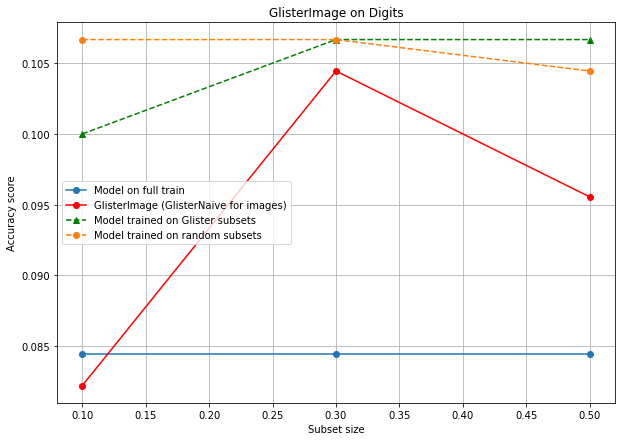

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], [image_fulltrain_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_image_acc, label = 'GlisterImage (GlisterNaive for images)', linestyle = "-", color = 'r', marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_image_subset_acc, label = 'Model trained on Glister subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], image_random_subsets_acc, label = 'Model trained on random subsets', linestyle = "--", marker = "o")
plt.grid()
plt.title('GlisterImage on Digits')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

In [15]:
from GlisterRegular.GlisterNaive import GlisterNaive
from GlisterRegular.GlisterStochastic import GlisterStochasticReg, GlisterStochasticNoReg

In [16]:
torch.manual_seed(42)
np.random.seed(42)

### Data

In [20]:
fullset = DNA_DATA(np.array(digits_train), np.array(targets_train))
valset = DNA_DATA(np.array(digits_train), np.array(targets_train))
testset = DNA_DATA(np.array(digits_test), np.array(targets_test))

### Model

In [28]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(64, 20)
        self.linear2 = torch.nn.Linear(20, 10)
    
    def forward(self, x, last=False):
        l1scores = torch.nn.functional.relu(self.linear1(x))
        scores = self.linear2(l1scores)
        if last:
            return scores, l1scores
        else:
            return scores

### GlisterNaive

In [29]:
glister_naive_acc = []
glister_naive_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister_naive = GlisterNaive(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 10,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_naive.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_naive_acc.append(tst_acc)
    glister_naive_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 2.294600486755371 140.7018060684204 6.9794275760650635
selEpoch: 0, Starting Selection: 2021-03-20 00:26:18.618076
numSelected: 0 Time for 1: 0.003456592559814453
selEpoch: 0, Selection Ended at: 2021-03-20 00:26:18.685779
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 13.897921562194824 140.6806411743164 6.959223031997681
selEpoch: 1, Starting Selection: 2021-03-20 00:26:18.706167
numSelected: 0 Time for 1: 0.0030660629272460938
selEpoch: 1, Selection Ended at: 2021-03-20 00:26:18.768740
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 13.889143466949463 140.63192653656006 6.959312438964844
selEpoch: 2, Starting Selection: 2021-03-20 00:26:18.789216
numSelected: 0 Time for 1: 0.002972126007080078


/Users/vladimiromelyusik/glister_online/final_experiments/GlisterRegular/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


selEpoch: 2, Selection Ended at: 2021-03-20 00:26:18.852998
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 13.86219835281372 140.58499431610107 6.952744960784912
selEpoch: 3, Starting Selection: 2021-03-20 00:26:18.874711
numSelected: 0 Time for 1: 0.003107786178588867
selEpoch: 3, Selection Ended at: 2021-03-20 00:26:18.937390
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 13.928851842880249 140.54399609565735 6.950717210769653
selEpoch: 4, Starting Selection: 2021-03-20 00:26:18.957842
numSelected: 0 Time for 1: 0.003032207489013672
selEpoch: 4, Selection Ended at: 2021-03-20 00:26:19.019202
Epoch: 6 SubsetTrn,FullTrn,ValLoss: 13.889681100845337 140.51717257499695 6.942861795425415
selEpoch: 5, Starting Selection: 2021-03-20 00:26:19.039325
numSelected: 0 Time for 1: 0.0030908584594726562
selEpoch: 5, Selection Ended at: 2021-03-20 00:26:19.104579
Epoch: 7 SubsetTrn,FullTrn,ValLoss: 13.768969297409058 140.52949213981628 6.943322658538818
selEpoch: 6, Starting Selection: 2021-03-20 00:26:19.125027
numSelec

selEpoch: 34, Selection Ended at: 2021-03-20 00:26:21.682066
Epoch: 36 SubsetTrn,FullTrn,ValLoss: 13.74895691871643 140.5686435699463 6.86738133430481
selEpoch: 35, Starting Selection: 2021-03-20 00:26:21.707615
numSelected: 0 Time for 1: 0.003771066665649414
selEpoch: 35, Selection Ended at: 2021-03-20 00:26:21.784297
Epoch: 37 SubsetTrn,FullTrn,ValLoss: 13.875838041305542 140.52783751487732 6.865450859069824
selEpoch: 36, Starting Selection: 2021-03-20 00:26:21.807233
numSelected: 0 Time for 1: 0.003198862075805664
selEpoch: 36, Selection Ended at: 2021-03-20 00:26:21.869961
Epoch: 38 SubsetTrn,FullTrn,ValLoss: 13.793389797210693 140.51199531555176 6.87255597114563
selEpoch: 37, Starting Selection: 2021-03-20 00:26:21.891043
numSelected: 0 Time for 1: 0.0030629634857177734
selEpoch: 37, Selection Ended at: 2021-03-20 00:26:21.955081
Epoch: 39 SubsetTrn,FullTrn,ValLoss: 13.731174945831299 140.53307557106018 6.872774362564087
selEpoch: 38, Starting Selection: 2021-03-20 00:26:21.975487

selEpoch: 66, Selection Ended at: 2021-03-20 00:26:24.508649
Epoch: 68 SubsetTrn,FullTrn,ValLoss: 13.803849220275879 140.4915759563446 6.862120628356934
selEpoch: 67, Starting Selection: 2021-03-20 00:26:24.529750
numSelected: 0 Time for 1: 0.003130197525024414
selEpoch: 67, Selection Ended at: 2021-03-20 00:26:24.592666
Epoch: 69 SubsetTrn,FullTrn,ValLoss: 13.840263843536377 140.46834182739258 6.85540246963501
selEpoch: 68, Starting Selection: 2021-03-20 00:26:24.615230
numSelected: 0 Time for 1: 0.0037708282470703125
selEpoch: 68, Selection Ended at: 2021-03-20 00:26:24.694577
Epoch: 70 SubsetTrn,FullTrn,ValLoss: 13.778504133224487 140.47640132904053 6.845588445663452
selEpoch: 69, Starting Selection: 2021-03-20 00:26:24.720032
numSelected: 0 Time for 1: 0.00400090217590332
selEpoch: 69, Selection Ended at: 2021-03-20 00:26:24.795510
Epoch: 71 SubsetTrn,FullTrn,ValLoss: 13.829415798187256 140.45983695983887 6.855023145675659
selEpoch: 70, Starting Selection: 2021-03-20 00:26:24.81717

numSelected: 0 Time for 1: 0.0030977725982666016
selEpoch: 100, Selection Ended at: 2021-03-20 00:26:27.623292
Epoch: 102 SubsetTrn,FullTrn,ValLoss: 13.786776304244995 140.4456913471222 6.848637580871582
selEpoch: 101, Starting Selection: 2021-03-20 00:26:27.644202
numSelected: 0 Time for 1: 0.0030879974365234375
selEpoch: 101, Selection Ended at: 2021-03-20 00:26:27.706993
Epoch: 103 SubsetTrn,FullTrn,ValLoss: 13.684346199035645 140.46644377708435 6.849632024765015
selEpoch: 102, Starting Selection: 2021-03-20 00:26:27.727145
numSelected: 0 Time for 1: 0.0029900074005126953
selEpoch: 102, Selection Ended at: 2021-03-20 00:26:27.792841
Epoch: 104 SubsetTrn,FullTrn,ValLoss: 13.802438020706177 140.42962527275085 6.857191324234009
selEpoch: 103, Starting Selection: 2021-03-20 00:26:27.816535
numSelected: 0 Time for 1: 0.003053903579711914
selEpoch: 103, Selection Ended at: 2021-03-20 00:26:27.879639
Epoch: 105 SubsetTrn,FullTrn,ValLoss: 13.743686199188232 140.42149567604065 6.854938268661

selEpoch: 131, Selection Ended at: 2021-03-20 00:26:30.361315
Epoch: 133 SubsetTrn,FullTrn,ValLoss: 13.789628267288208 140.2983100414276 6.83857798576355
selEpoch: 132, Starting Selection: 2021-03-20 00:26:30.382288
numSelected: 0 Time for 1: 0.003439188003540039
selEpoch: 132, Selection Ended at: 2021-03-20 00:26:30.445873
Epoch: 134 SubsetTrn,FullTrn,ValLoss: 13.736242532730103 140.31116914749146 6.839693546295166
selEpoch: 133, Starting Selection: 2021-03-20 00:26:30.466554
numSelected: 0 Time for 1: 0.0033807754516601562
selEpoch: 133, Selection Ended at: 2021-03-20 00:26:30.529823
Epoch: 135 SubsetTrn,FullTrn,ValLoss: 13.761539936065674 140.3092601299286 6.835222482681274
selEpoch: 134, Starting Selection: 2021-03-20 00:26:30.550258
numSelected: 0 Time for 1: 0.0030007362365722656
selEpoch: 134, Selection Ended at: 2021-03-20 00:26:30.613702
Epoch: 136 SubsetTrn,FullTrn,ValLoss: 13.781280040740967 140.29479241371155 6.835623025894165
selEpoch: 135, Starting Selection: 2021-03-20 0

selEpoch: 162, Selection Ended at: 2021-03-20 00:26:33.034862
Epoch: 164 SubsetTrn,FullTrn,ValLoss: 13.75545597076416 140.19291758537292 6.839947462081909
selEpoch: 163, Starting Selection: 2021-03-20 00:26:33.059620
numSelected: 0 Time for 1: 0.003587961196899414
selEpoch: 163, Selection Ended at: 2021-03-20 00:26:33.138969
Epoch: 165 SubsetTrn,FullTrn,ValLoss: 13.801666975021362 140.16701197624207 6.82862401008606
selEpoch: 164, Starting Selection: 2021-03-20 00:26:33.165034
numSelected: 0 Time for 1: 0.003944873809814453
selEpoch: 164, Selection Ended at: 2021-03-20 00:26:33.247169
Epoch: 166 SubsetTrn,FullTrn,ValLoss: 13.786811351776123 140.1329174041748 6.8486857414245605
selEpoch: 165, Starting Selection: 2021-03-20 00:26:33.271709
numSelected: 0 Time for 1: 0.0036957263946533203
selEpoch: 165, Selection Ended at: 2021-03-20 00:26:33.348982
Epoch: 167 SubsetTrn,FullTrn,ValLoss: 13.742729663848877 140.1229705810547 6.834294319152832
selEpoch: 166, Starting Selection: 2021-03-20 00

selEpoch: 194, Selection Ended at: 2021-03-20 00:26:35.841577
Epoch: 196 SubsetTrn,FullTrn,ValLoss: 13.72753357887268 140.02962017059326 6.811328172683716
selEpoch: 195, Starting Selection: 2021-03-20 00:26:35.863105
numSelected: 0 Time for 1: 0.003147125244140625
selEpoch: 195, Selection Ended at: 2021-03-20 00:26:35.925879
Epoch: 197 SubsetTrn,FullTrn,ValLoss: 13.71860146522522 140.038507938385 6.813604354858398
selEpoch: 196, Starting Selection: 2021-03-20 00:26:35.946108
numSelected: 0 Time for 1: 0.003134012222290039
selEpoch: 196, Selection Ended at: 2021-03-20 00:26:36.009036
Epoch: 198 SubsetTrn,FullTrn,ValLoss: 13.760315418243408 139.9931161403656 6.8140342235565186
selEpoch: 197, Starting Selection: 2021-03-20 00:26:36.030150
numSelected: 0 Time for 1: 0.003282308578491211
selEpoch: 197, Selection Ended at: 2021-03-20 00:26:36.093977
Epoch: 199 SubsetTrn,FullTrn,ValLoss: 13.713910102844238 139.9967279434204 6.815138578414917
selEpoch: 198, Starting Selection: 2021-03-20 00:26

selEpoch: 25, Selection Ended at: 2021-03-20 00:26:39.167136
Epoch: 27 SubsetTrn,FullTrn,ValLoss: 46.022565841674805 140.50212860107422 6.862039089202881
selEpoch: 26, Starting Selection: 2021-03-20 00:26:39.198111
numSelected: 0 Time for 1: 0.001737833023071289
selEpoch: 26, Selection Ended at: 2021-03-20 00:26:39.294400
Epoch: 28 SubsetTrn,FullTrn,ValLoss: 46.040279388427734 140.4862563610077 6.860097408294678
selEpoch: 27, Starting Selection: 2021-03-20 00:26:39.328358
numSelected: 0 Time for 1: 0.0015110969543457031
selEpoch: 27, Selection Ended at: 2021-03-20 00:26:39.421652
Epoch: 29 SubsetTrn,FullTrn,ValLoss: 46.01951551437378 140.47415328025818 6.856513261795044
selEpoch: 28, Starting Selection: 2021-03-20 00:26:39.454783
numSelected: 0 Time for 1: 0.001516103744506836
selEpoch: 28, Selection Ended at: 2021-03-20 00:26:39.532126
Epoch: 30 SubsetTrn,FullTrn,ValLoss: 45.976725816726685 140.4870321750641 6.854115962982178
selEpoch: 29, Starting Selection: 2021-03-20 00:26:39.56092

selEpoch: 57, Selection Ended at: 2021-03-20 00:26:42.708550
Epoch: 59 SubsetTrn,FullTrn,ValLoss: 45.94494366645813 140.31622886657715 6.84131932258606
selEpoch: 58, Starting Selection: 2021-03-20 00:26:42.737884
numSelected: 0 Time for 1: 0.0013742446899414062
selEpoch: 58, Selection Ended at: 2021-03-20 00:26:42.813248
Epoch: 60 SubsetTrn,FullTrn,ValLoss: 46.005101442337036 140.2839436531067 6.839726686477661
selEpoch: 59, Starting Selection: 2021-03-20 00:26:42.841614
numSelected: 0 Time for 1: 0.0013210773468017578
selEpoch: 59, Selection Ended at: 2021-03-20 00:26:42.916517
Epoch: 61 SubsetTrn,FullTrn,ValLoss: 46.00367617607117 140.2493212223053 6.857276678085327
selEpoch: 60, Starting Selection: 2021-03-20 00:26:42.945869
numSelected: 0 Time for 1: 0.0013422966003417969
selEpoch: 60, Selection Ended at: 2021-03-20 00:26:43.021945
Epoch: 62 SubsetTrn,FullTrn,ValLoss: 46.00202989578247 140.23748779296875 6.8543291091918945
selEpoch: 61, Starting Selection: 2021-03-20 00:26:43.05021

selEpoch: 89, Selection Ended at: 2021-03-20 00:26:46.153832
Epoch: 91 SubsetTrn,FullTrn,ValLoss: 45.81849765777588 140.08776926994324 6.806428909301758
selEpoch: 90, Starting Selection: 2021-03-20 00:26:46.182999
numSelected: 0 Time for 1: 0.0013759136199951172
selEpoch: 90, Selection Ended at: 2021-03-20 00:26:46.258639
Epoch: 92 SubsetTrn,FullTrn,ValLoss: 45.86453366279602 140.08053851127625 6.814501762390137
selEpoch: 91, Starting Selection: 2021-03-20 00:26:46.286784
numSelected: 0 Time for 1: 0.0012848377227783203
selEpoch: 91, Selection Ended at: 2021-03-20 00:26:46.362448
Epoch: 93 SubsetTrn,FullTrn,ValLoss: 45.890493869781494 140.04609060287476 6.814982891082764
selEpoch: 92, Starting Selection: 2021-03-20 00:26:46.391444
numSelected: 0 Time for 1: 0.0014390945434570312
selEpoch: 92, Selection Ended at: 2021-03-20 00:26:46.467114
Epoch: 94 SubsetTrn,FullTrn,ValLoss: 45.80233359336853 140.05190658569336 6.81219482421875
selEpoch: 93, Starting Selection: 2021-03-20 00:26:46.4955

selEpoch: 121, Selection Ended at: 2021-03-20 00:26:49.515801
Epoch: 123 SubsetTrn,FullTrn,ValLoss: 45.69946026802063 139.419499874115 6.790011644363403
selEpoch: 122, Starting Selection: 2021-03-20 00:26:49.544832
numSelected: 0 Time for 1: 0.0014469623565673828
selEpoch: 122, Selection Ended at: 2021-03-20 00:26:49.620978
Epoch: 124 SubsetTrn,FullTrn,ValLoss: 45.67444396018982 139.40907287597656 6.788969039916992
selEpoch: 123, Starting Selection: 2021-03-20 00:26:49.650297
numSelected: 0 Time for 1: 0.0013589859008789062
selEpoch: 123, Selection Ended at: 2021-03-20 00:26:49.726594
Epoch: 125 SubsetTrn,FullTrn,ValLoss: 45.597651958465576 139.3829436302185 6.7837090492248535
selEpoch: 124, Starting Selection: 2021-03-20 00:26:49.755767
numSelected: 0 Time for 1: 0.0014781951904296875
selEpoch: 124, Selection Ended at: 2021-03-20 00:26:49.831799
Epoch: 126 SubsetTrn,FullTrn,ValLoss: 45.67697548866272 139.3519902229309 6.787156820297241
selEpoch: 125, Starting Selection: 2021-03-20 00:

selEpoch: 153, Selection Ended at: 2021-03-20 00:26:52.861273
Epoch: 155 SubsetTrn,FullTrn,ValLoss: 45.29550552368164 138.04092168807983 6.73882532119751
selEpoch: 154, Starting Selection: 2021-03-20 00:26:52.889461
numSelected: 0 Time for 1: 0.0015060901641845703
selEpoch: 154, Selection Ended at: 2021-03-20 00:26:52.965500
Epoch: 156 SubsetTrn,FullTrn,ValLoss: 45.207590103149414 138.00594282150269 6.716646909713745
selEpoch: 155, Starting Selection: 2021-03-20 00:26:52.994165
numSelected: 0 Time for 1: 0.0014338493347167969
selEpoch: 155, Selection Ended at: 2021-03-20 00:26:53.069953
Epoch: 157 SubsetTrn,FullTrn,ValLoss: 45.22480344772339 137.97132778167725 6.709260940551758
selEpoch: 156, Starting Selection: 2021-03-20 00:26:53.099039
numSelected: 0 Time for 1: 0.0014259815216064453
selEpoch: 156, Selection Ended at: 2021-03-20 00:26:53.175555
Epoch: 158 SubsetTrn,FullTrn,ValLoss: 45.130311489105225 137.9276442527771 6.705885410308838
selEpoch: 157, Starting Selection: 2021-03-20 0

selEpoch: 185, Selection Ended at: 2021-03-20 00:26:56.217131
Epoch: 187 SubsetTrn,FullTrn,ValLoss: 44.3446524143219 135.3248519897461 6.545638561248779
selEpoch: 186, Starting Selection: 2021-03-20 00:26:56.246903
numSelected: 0 Time for 1: 0.001499176025390625
selEpoch: 186, Selection Ended at: 2021-03-20 00:26:56.325265
Epoch: 188 SubsetTrn,FullTrn,ValLoss: 44.262681007385254 135.14927625656128 6.559702396392822
selEpoch: 187, Starting Selection: 2021-03-20 00:26:56.354660
numSelected: 0 Time for 1: 0.0014710426330566406
selEpoch: 187, Selection Ended at: 2021-03-20 00:26:56.432032
Epoch: 189 SubsetTrn,FullTrn,ValLoss: 44.29236388206482 135.06057906150818 6.539326190948486
selEpoch: 188, Starting Selection: 2021-03-20 00:26:56.462363
numSelected: 0 Time for 1: 0.0013990402221679688
selEpoch: 188, Selection Ended at: 2021-03-20 00:26:56.539888
Epoch: 190 SubsetTrn,FullTrn,ValLoss: 44.21710276603699 134.94207763671875 6.527371168136597
selEpoch: 189, Starting Selection: 2021-03-20 00:

selEpoch: 16, Selection Ended at: 2021-03-20 00:26:59.858032
Epoch: 18 SubsetTrn,FullTrn,ValLoss: 75.89320278167725 140.13265895843506 6.872831583023071
selEpoch: 17, Starting Selection: 2021-03-20 00:26:59.894390
numSelected: 0 Time for 1: 0.0009770393371582031
selEpoch: 17, Selection Ended at: 2021-03-20 00:26:59.981667
Epoch: 19 SubsetTrn,FullTrn,ValLoss: 75.74153399467468 140.12508583068848 6.869472980499268
selEpoch: 18, Starting Selection: 2021-03-20 00:27:00.017566
numSelected: 0 Time for 1: 0.0010061264038085938
selEpoch: 18, Selection Ended at: 2021-03-20 00:27:00.107368
Epoch: 20 SubsetTrn,FullTrn,ValLoss: 75.83990478515625 140.09096479415894 6.868072271347046
selEpoch: 19, Starting Selection: 2021-03-20 00:27:00.143571
numSelected: 0 Time for 1: 0.001020193099975586
selEpoch: 19, Selection Ended at: 2021-03-20 00:27:00.231914
Epoch: 21 SubsetTrn,FullTrn,ValLoss: 75.74005842208862 140.0739974975586 6.871806621551514
selEpoch: 20, Starting Selection: 2021-03-20 00:27:00.267464

selEpoch: 48, Selection Ended at: 2021-03-20 00:27:03.877950
Epoch: 50 SubsetTrn,FullTrn,ValLoss: 75.26738810539246 139.0841040611267 6.821329593658447
selEpoch: 49, Starting Selection: 2021-03-20 00:27:03.914401
numSelected: 0 Time for 1: 0.0010030269622802734
selEpoch: 49, Selection Ended at: 2021-03-20 00:27:04.003345
Epoch: 51 SubsetTrn,FullTrn,ValLoss: 75.31458592414856 139.04171514511108 6.819473505020142
selEpoch: 50, Starting Selection: 2021-03-20 00:27:04.039357
numSelected: 0 Time for 1: 0.0010650157928466797
selEpoch: 50, Selection Ended at: 2021-03-20 00:27:04.147296
Epoch: 52 SubsetTrn,FullTrn,ValLoss: 75.20170259475708 138.98544478416443 6.812565565109253
selEpoch: 51, Starting Selection: 2021-03-20 00:27:04.190039
numSelected: 0 Time for 1: 0.0011379718780517578
selEpoch: 51, Selection Ended at: 2021-03-20 00:27:04.287638
Epoch: 53 SubsetTrn,FullTrn,ValLoss: 75.15122652053833 138.92801713943481 6.805837392807007
selEpoch: 52, Starting Selection: 2021-03-20 00:27:04.32456

selEpoch: 80, Selection Ended at: 2021-03-20 00:27:08.198871
Epoch: 82 SubsetTrn,FullTrn,ValLoss: 73.3841290473938 135.5849266052246 6.634573936462402
selEpoch: 81, Starting Selection: 2021-03-20 00:27:08.236132
numSelected: 0 Time for 1: 0.001065969467163086
selEpoch: 81, Selection Ended at: 2021-03-20 00:27:08.324842
Epoch: 83 SubsetTrn,FullTrn,ValLoss: 73.29026556015015 135.38054990768433 6.626335382461548
selEpoch: 82, Starting Selection: 2021-03-20 00:27:08.360992
numSelected: 0 Time for 1: 0.0009889602661132812
selEpoch: 82, Selection Ended at: 2021-03-20 00:27:08.452810
Epoch: 84 SubsetTrn,FullTrn,ValLoss: 73.2077534198761 135.21011304855347 6.62403678894043
selEpoch: 83, Starting Selection: 2021-03-20 00:27:08.489086
numSelected: 0 Time for 1: 0.0010938644409179688
selEpoch: 83, Selection Ended at: 2021-03-20 00:27:08.576650
Epoch: 85 SubsetTrn,FullTrn,ValLoss: 73.08080863952637 134.99116587638855 6.599522590637207
selEpoch: 84, Starting Selection: 2021-03-20 00:27:08.613440
nu

selEpoch: 112, Selection Ended at: 2021-03-20 00:27:12.731984
Epoch: 114 SubsetTrn,FullTrn,ValLoss: 67.7203620672226 124.88304936885834 6.082454681396484
selEpoch: 113, Starting Selection: 2021-03-20 00:27:12.768033
numSelected: 0 Time for 1: 0.0009708404541015625
selEpoch: 113, Selection Ended at: 2021-03-20 00:27:12.858021
Epoch: 115 SubsetTrn,FullTrn,ValLoss: 67.60877859592438 124.32566964626312 6.072842001914978
selEpoch: 114, Starting Selection: 2021-03-20 00:27:12.894868
numSelected: 0 Time for 1: 0.0010328292846679688
selEpoch: 114, Selection Ended at: 2021-03-20 00:27:12.986140
Epoch: 116 SubsetTrn,FullTrn,ValLoss: 67.02919232845306 123.80901765823364 6.027746558189392
selEpoch: 115, Starting Selection: 2021-03-20 00:27:13.022912
numSelected: 0 Time for 1: 0.0010981559753417969
selEpoch: 115, Selection Ended at: 2021-03-20 00:27:13.111902
Epoch: 117 SubsetTrn,FullTrn,ValLoss: 67.28594470024109 123.37307095527649 6.013356566429138
selEpoch: 116, Starting Selection: 2021-03-20 00

selEpoch: 144, Selection Ended at: 2021-03-20 00:27:16.917086
Epoch: 146 SubsetTrn,FullTrn,ValLoss: 57.299697041511536 104.79982435703278 5.068380832672119
selEpoch: 145, Starting Selection: 2021-03-20 00:27:16.955626
numSelected: 0 Time for 1: 0.0010459423065185547
selEpoch: 145, Selection Ended at: 2021-03-20 00:27:17.046726
Epoch: 147 SubsetTrn,FullTrn,ValLoss: 56.8189263343811 104.17740035057068 5.046300649642944
selEpoch: 146, Starting Selection: 2021-03-20 00:27:17.082565
numSelected: 0 Time for 1: 0.0009839534759521484
selEpoch: 146, Selection Ended at: 2021-03-20 00:27:17.171829
Epoch: 148 SubsetTrn,FullTrn,ValLoss: 56.64529097080231 103.44354581832886 5.035197496414185
selEpoch: 147, Starting Selection: 2021-03-20 00:27:17.208494
numSelected: 0 Time for 1: 0.0009930133819580078
selEpoch: 147, Selection Ended at: 2021-03-20 00:27:17.297581
Epoch: 149 SubsetTrn,FullTrn,ValLoss: 56.429792642593384 102.65383005142212 5.029297590255737
selEpoch: 148, Starting Selection: 2021-03-20 

selEpoch: 176, Selection Ended at: 2021-03-20 00:27:21.021400
Epoch: 178 SubsetTrn,FullTrn,ValLoss: 44.115482330322266 81.97158908843994 4.025734186172485
selEpoch: 177, Starting Selection: 2021-03-20 00:27:21.059091
numSelected: 0 Time for 1: 0.0010581016540527344
selEpoch: 177, Selection Ended at: 2021-03-20 00:27:21.148910
Epoch: 179 SubsetTrn,FullTrn,ValLoss: 44.864829778671265 81.00370562076569 3.9769937992095947
selEpoch: 178, Starting Selection: 2021-03-20 00:27:21.185312
numSelected: 0 Time for 1: 0.0009999275207519531
selEpoch: 178, Selection Ended at: 2021-03-20 00:27:21.275017
Epoch: 180 SubsetTrn,FullTrn,ValLoss: 44.675886273384094 80.17938458919525 3.928913116455078
selEpoch: 179, Starting Selection: 2021-03-20 00:27:21.311947
numSelected: 0 Time for 1: 0.0011088848114013672
selEpoch: 179, Selection Ended at: 2021-03-20 00:27:21.401322
Epoch: 181 SubsetTrn,FullTrn,ValLoss: 43.702871561050415 79.73148691654205 3.9179505109786987
selEpoch: 180, Starting Selection: 2021-03-20

### GlisterStochasticReg

In [30]:
glister_stoch_reg_acc = []
glister_stoch_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 10,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_reg_acc.append(tst_acc)
    glister_stoch_reg_indexes.append(idxs)

numSelected: 0 Time for 1: 0.0033850669860839844
numSelected: 0 Time for 1: 0.003668069839477539
numSelected: 0 Time for 1: 0.003010988235473633
numSelected: 0 Time for 1: 0.003101825714111328
numSelected: 0 Time for 1: 0.0030400753021240234
numSelected: 0 Time for 1: 0.003003835678100586
numSelected: 0 Time for 1: 0.003194093704223633
numSelected: 0 Time for 1: 0.003030061721801758
numSelected: 0 Time for 1: 0.0031189918518066406
numSelected: 0 Time for 1: 0.0032351016998291016
numSelected: 0 Time for 1: 0.0030939579010009766
numSelected: 0 Time for 1: 0.0032739639282226562
numSelected: 0 Time for 1: 0.00434422492980957
numSelected: 0 Time for 1: 0.003531932830810547
numSelected: 0 Time for 1: 0.003464221954345703
numSelected: 0 Time for 1: 0.003679990768432617
numSelected: 0 Time for 1: 0.003306150436401367
numSelected: 0 Time for 1: 0.0033478736877441406
numSelected: 0 Time for 1: 0.003156900405883789
numSelected: 0 Time for 1: 0.004061222076416016
numSelected: 0 Time for 1: 0.00350

numSelected: 0 Time for 1: 0.0033860206604003906
numSelected: 0 Time for 1: 0.003301858901977539
numSelected: 0 Time for 1: 0.0031049251556396484
numSelected: 0 Time for 1: 0.0031468868255615234
numSelected: 0 Time for 1: 0.003385782241821289
numSelected: 0 Time for 1: 0.0033631324768066406
numSelected: 0 Time for 1: 0.0035161972045898438
numSelected: 0 Time for 1: 0.003156900405883789
numSelected: 0 Time for 1: 0.004044055938720703
numSelected: 0 Time for 1: 0.003732919692993164
numSelected: 0 Time for 1: 0.004157066345214844
numSelected: 0 Time for 1: 0.0045566558837890625
numSelected: 0 Time for 1: 0.0031480789184570312
numSelected: 0 Time for 1: 0.004228115081787109
numSelected: 0 Time for 1: 0.0033440589904785156
numSelected: 0 Time for 1: 0.0033919811248779297
numSelected: 0 Time for 1: 0.003299713134765625
numSelected: 0 Time for 1: 0.003997087478637695
numSelected: 0 Time for 1: 0.0040051937103271484
numSelected: 0 Time for 1: 0.0033478736877441406
numSelected: 0 Time for 1: 0.

numSelected: 0 Time for 1: 0.00140380859375
numSelected: 0 Time for 1: 0.0013701915740966797
numSelected: 0 Time for 1: 0.0012888908386230469
numSelected: 0 Time for 1: 0.0013241767883300781
numSelected: 0 Time for 1: 0.0017290115356445312
numSelected: 0 Time for 1: 0.0013840198516845703
numSelected: 0 Time for 1: 0.0012938976287841797
numSelected: 0 Time for 1: 0.0013170242309570312
numSelected: 0 Time for 1: 0.001615762710571289
numSelected: 0 Time for 1: 0.0013141632080078125
numSelected: 0 Time for 1: 0.0013701915740966797
numSelected: 0 Time for 1: 0.0013928413391113281
numSelected: 0 Time for 1: 0.001394033432006836
numSelected: 0 Time for 1: 0.0013229846954345703
numSelected: 0 Time for 1: 0.0013301372528076172
numSelected: 0 Time for 1: 0.0013878345489501953
numSelected: 0 Time for 1: 0.0013360977172851562
numSelected: 0 Time for 1: 0.0013501644134521484
numSelected: 0 Time for 1: 0.0013530254364013672
numSelected: 0 Time for 1: 0.0013298988342285156
numSelected: 0 Time for 1: 

numSelected: 0 Time for 1: 0.0011751651763916016
numSelected: 0 Time for 1: 0.0009748935699462891
numSelected: 0 Time for 1: 0.0011358261108398438
numSelected: 0 Time for 1: 0.0009419918060302734
numSelected: 0 Time for 1: 0.0010249614715576172
numSelected: 0 Time for 1: 0.0010917186737060547
numSelected: 0 Time for 1: 0.0012269020080566406
numSelected: 0 Time for 1: 0.0011777877807617188
numSelected: 0 Time for 1: 0.0011110305786132812
numSelected: 0 Time for 1: 0.0010440349578857422
numSelected: 0 Time for 1: 0.0010399818420410156
numSelected: 0 Time for 1: 0.0010941028594970703
numSelected: 0 Time for 1: 0.0010259151458740234
numSelected: 0 Time for 1: 0.0010809898376464844
numSelected: 0 Time for 1: 0.001104116439819336
numSelected: 0 Time for 1: 0.0010569095611572266
numSelected: 0 Time for 1: 0.0011241436004638672
numSelected: 0 Time for 1: 0.0010089874267578125
numSelected: 0 Time for 1: 0.0012271404266357422
numSelected: 0 Time for 1: 0.0009529590606689453
numSelected: 0 Time f

In [31]:
glister_stoch_no_reg_acc = []
glister_stoch_no_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticNoReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 10,
    n_channels = 1,
    bud = int(k * len(fullset)))
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_no_reg_acc.append(tst_acc)
    glister_stoch_no_reg_indexes.append(idxs)

numSelected: 0 Time for 1: 0.0008671283721923828
numSelected: 100 Time for 1: 0.0007352828979492188
numSelected: 0 Time for 1: 0.0007519721984863281
numSelected: 100 Time for 1: 0.0007352828979492188
numSelected: 0 Time for 1: 0.0009109973907470703
numSelected: 100 Time for 1: 0.0007531642913818359
numSelected: 0 Time for 1: 0.0007848739624023438
numSelected: 100 Time for 1: 0.0007779598236083984
numSelected: 0 Time for 1: 0.0007181167602539062
numSelected: 100 Time for 1: 0.0010199546813964844
numSelected: 0 Time for 1: 0.0012669563293457031
numSelected: 100 Time for 1: 0.0007550716400146484
numSelected: 0 Time for 1: 0.0009119510650634766
numSelected: 100 Time for 1: 0.0006940364837646484
numSelected: 0 Time for 1: 0.0009469985961914062
numSelected: 100 Time for 1: 0.0006830692291259766
numSelected: 0 Time for 1: 0.0007407665252685547
numSelected: 100 Time for 1: 0.0007588863372802734
numSelected: 0 Time for 1: 0.0008127689361572266
numSelected: 100 Time for 1: 0.0007963180541992188


numSelected: 100 Time for 1: 0.0008893013000488281
numSelected: 0 Time for 1: 0.0011591911315917969
numSelected: 100 Time for 1: 0.0009200572967529297
numSelected: 0 Time for 1: 0.0010268688201904297
numSelected: 100 Time for 1: 0.0007569789886474609
numSelected: 0 Time for 1: 0.0008268356323242188
numSelected: 100 Time for 1: 0.0008420944213867188
numSelected: 0 Time for 1: 0.0008540153503417969
numSelected: 100 Time for 1: 0.0007700920104980469
numSelected: 0 Time for 1: 0.0008518695831298828
numSelected: 100 Time for 1: 0.0007588863372802734
numSelected: 0 Time for 1: 0.0007359981536865234
numSelected: 100 Time for 1: 0.0008258819580078125
numSelected: 0 Time for 1: 0.0018889904022216797
numSelected: 100 Time for 1: 0.0008120536804199219
numSelected: 0 Time for 1: 0.0009548664093017578
numSelected: 100 Time for 1: 0.0008060932159423828
numSelected: 0 Time for 1: 0.0010688304901123047
numSelected: 100 Time for 1: 0.0007607936859130859
numSelected: 0 Time for 1: 0.0008502006530761719


numSelected: 0 Time for 1: 0.0007681846618652344
numSelected: 100 Time for 1: 0.0006582736968994141
numSelected: 0 Time for 1: 0.0007171630859375
numSelected: 100 Time for 1: 0.0007107257843017578
numSelected: 0 Time for 1: 0.0009148120880126953
numSelected: 100 Time for 1: 0.0007948875427246094
numSelected: 0 Time for 1: 0.0008738040924072266
numSelected: 100 Time for 1: 0.0007550716400146484
numSelected: 0 Time for 1: 0.0007932186126708984
numSelected: 100 Time for 1: 0.0007150173187255859
numSelected: 0 Time for 1: 0.0007269382476806641
numSelected: 100 Time for 1: 0.0007548332214355469
numSelected: 0 Time for 1: 0.0007836818695068359
numSelected: 100 Time for 1: 0.00074005126953125
numSelected: 0 Time for 1: 0.0008118152618408203
numSelected: 100 Time for 1: 0.000743865966796875
numSelected: 0 Time for 1: 0.0007431507110595703
numSelected: 100 Time for 1: 0.0006959438323974609
numSelected: 0 Time for 1: 0.0007317066192626953
numSelected: 100 Time for 1: 0.0006830692291259766
numSel

numSelected: 0 Time for 1: 0.0006818771362304688
numSelected: 100 Time for 1: 0.0006120204925537109
numSelected: 200 Time for 1: 0.0005600452423095703
numSelected: 300 Time for 1: 0.0005512237548828125
numSelected: 400 Time for 1: 0.0005221366882324219
numSelected: 0 Time for 1: 0.0006809234619140625
numSelected: 100 Time for 1: 0.0005691051483154297
numSelected: 200 Time for 1: 0.00048613548278808594
numSelected: 300 Time for 1: 0.0005269050598144531
numSelected: 400 Time for 1: 0.0005657672882080078
numSelected: 0 Time for 1: 0.0005369186401367188
numSelected: 100 Time for 1: 0.0004889965057373047
numSelected: 200 Time for 1: 0.0005850791931152344
numSelected: 300 Time for 1: 0.0004889965057373047
numSelected: 400 Time for 1: 0.0005109310150146484
numSelected: 0 Time for 1: 0.0006918907165527344
numSelected: 100 Time for 1: 0.0006489753723144531
numSelected: 200 Time for 1: 0.0005161762237548828
numSelected: 300 Time for 1: 0.0004889965057373047
numSelected: 400 Time for 1: 0.0005309

numSelected: 400 Time for 1: 0.0005660057067871094
numSelected: 0 Time for 1: 0.0007090568542480469
numSelected: 100 Time for 1: 0.0005459785461425781
numSelected: 200 Time for 1: 0.0005910396575927734
numSelected: 300 Time for 1: 0.0005970001220703125
numSelected: 400 Time for 1: 0.0005450248718261719
numSelected: 0 Time for 1: 0.0006718635559082031
numSelected: 100 Time for 1: 0.0005288124084472656
numSelected: 200 Time for 1: 0.0005371570587158203
numSelected: 300 Time for 1: 0.0006060600280761719
numSelected: 400 Time for 1: 0.0005502700805664062
numSelected: 0 Time for 1: 0.0007190704345703125
numSelected: 100 Time for 1: 0.0005590915679931641
numSelected: 200 Time for 1: 0.0005252361297607422
numSelected: 300 Time for 1: 0.0005490779876708984
numSelected: 400 Time for 1: 0.0005440711975097656
numSelected: 0 Time for 1: 0.0006549358367919922
numSelected: 100 Time for 1: 0.0005810260772705078
numSelected: 200 Time for 1: 0.0005121231079101562
numSelected: 300 Time for 1: 0.00051808

numSelected: 300 Time for 1: 0.0005393028259277344
numSelected: 400 Time for 1: 0.0005421638488769531
numSelected: 0 Time for 1: 0.0005211830139160156
numSelected: 100 Time for 1: 0.0005919933319091797
numSelected: 200 Time for 1: 0.0005478858947753906
numSelected: 300 Time for 1: 0.0004978179931640625
numSelected: 400 Time for 1: 0.0004971027374267578
numSelected: 0 Time for 1: 0.0005347728729248047
numSelected: 100 Time for 1: 0.0006399154663085938
numSelected: 200 Time for 1: 0.0004918575286865234
numSelected: 300 Time for 1: 0.0005030632019042969
numSelected: 400 Time for 1: 0.0005567073822021484
numSelected: 0 Time for 1: 0.0006539821624755859
numSelected: 100 Time for 1: 0.0005409717559814453
numSelected: 200 Time for 1: 0.0005450248718261719
numSelected: 300 Time for 1: 0.0006489753723144531
numSelected: 400 Time for 1: 0.0005249977111816406
numSelected: 0 Time for 1: 0.0005648136138916016
numSelected: 100 Time for 1: 0.0005810260772705078
numSelected: 200 Time for 1: 0.00057125

numSelected: 200 Time for 1: 0.0006051063537597656
numSelected: 300 Time for 1: 0.0005178451538085938
numSelected: 400 Time for 1: 0.0005469322204589844
numSelected: 0 Time for 1: 0.0005440711975097656
numSelected: 100 Time for 1: 0.0005099773406982422
numSelected: 200 Time for 1: 0.0006070137023925781
numSelected: 300 Time for 1: 0.0005168914794921875
numSelected: 400 Time for 1: 0.000514984130859375
numSelected: 0 Time for 1: 0.0006377696990966797
numSelected: 100 Time for 1: 0.0005230903625488281
numSelected: 200 Time for 1: 0.0005099773406982422
numSelected: 300 Time for 1: 0.0004899501800537109
numSelected: 400 Time for 1: 0.0004968643188476562
numSelected: 0 Time for 1: 0.0005869865417480469
numSelected: 100 Time for 1: 0.0005502700805664062
numSelected: 200 Time for 1: 0.0006330013275146484
numSelected: 300 Time for 1: 0.0005598068237304688
numSelected: 400 Time for 1: 0.0004999637603759766
numSelected: 0 Time for 1: 0.0007107257843017578
numSelected: 100 Time for 1: 0.000563859

numSelected: 200 Time for 1: 0.0006000995635986328
numSelected: 300 Time for 1: 0.0005769729614257812
numSelected: 400 Time for 1: 0.000560760498046875
numSelected: 0 Time for 1: 0.000614166259765625
numSelected: 100 Time for 1: 0.0005381107330322266
numSelected: 200 Time for 1: 0.0005140304565429688
numSelected: 300 Time for 1: 0.0005891323089599609
numSelected: 400 Time for 1: 0.00047326087951660156
numSelected: 0 Time for 1: 0.0006840229034423828
numSelected: 100 Time for 1: 0.0005548000335693359
numSelected: 200 Time for 1: 0.0005052089691162109
numSelected: 300 Time for 1: 0.0004930496215820312
numSelected: 400 Time for 1: 0.0005362033843994141
numSelected: 0 Time for 1: 0.0005979537963867188
numSelected: 100 Time for 1: 0.0006000995635986328
numSelected: 200 Time for 1: 0.0005769729614257812
numSelected: 300 Time for 1: 0.0005729198455810547
numSelected: 400 Time for 1: 0.000492095947265625
numSelected: 0 Time for 1: 0.0005388259887695312
numSelected: 100 Time for 1: 0.0005462169

numSelected: 100 Time for 1: 0.0005159378051757812
numSelected: 200 Time for 1: 0.0004928112030029297
numSelected: 300 Time for 1: 0.0005528926849365234
numSelected: 400 Time for 1: 0.0005030632019042969
numSelected: 0 Time for 1: 0.0006868839263916016
numSelected: 100 Time for 1: 0.0005650520324707031
numSelected: 200 Time for 1: 0.0005769729614257812
numSelected: 300 Time for 1: 0.0005428791046142578
numSelected: 400 Time for 1: 0.0005581378936767578
numSelected: 0 Time for 1: 0.0006542205810546875
numSelected: 100 Time for 1: 0.0005991458892822266
numSelected: 200 Time for 1: 0.0005190372467041016
numSelected: 300 Time for 1: 0.0004830360412597656
numSelected: 400 Time for 1: 0.0004868507385253906
numSelected: 0 Time for 1: 0.0006012916564941406
numSelected: 100 Time for 1: 0.0005881786346435547
numSelected: 200 Time for 1: 0.0005638599395751953
numSelected: 300 Time for 1: 0.0005249977111816406
numSelected: 400 Time for 1: 0.0005440711975097656
numSelected: 0 Time for 1: 0.00054812

numSelected: 0 Time for 1: 0.0005979537963867188
numSelected: 100 Time for 1: 0.0005927085876464844
numSelected: 200 Time for 1: 0.00047898292541503906
numSelected: 300 Time for 1: 0.00046706199645996094
numSelected: 400 Time for 1: 0.0004899501800537109
numSelected: 500 Time for 1: 0.0004820823669433594
numSelected: 600 Time for 1: 0.0004439353942871094
numSelected: 0 Time for 1: 0.0006048679351806641
numSelected: 100 Time for 1: 0.000576019287109375
numSelected: 200 Time for 1: 0.0004589557647705078
numSelected: 300 Time for 1: 0.0004951953887939453
numSelected: 400 Time for 1: 0.0005099773406982422
numSelected: 500 Time for 1: 0.00043392181396484375
numSelected: 600 Time for 1: 0.0004467964172363281
numSelected: 0 Time for 1: 0.0006220340728759766
numSelected: 100 Time for 1: 0.0005030632019042969
numSelected: 200 Time for 1: 0.0004942417144775391
numSelected: 300 Time for 1: 0.0004911422729492188
numSelected: 400 Time for 1: 0.00045180320739746094
numSelected: 500 Time for 1: 0.000

numSelected: 400 Time for 1: 0.0005335807800292969
numSelected: 500 Time for 1: 0.0004837512969970703
numSelected: 600 Time for 1: 0.0004489421844482422
numSelected: 0 Time for 1: 0.0005388259887695312
numSelected: 100 Time for 1: 0.00046706199645996094
numSelected: 200 Time for 1: 0.0004818439483642578
numSelected: 300 Time for 1: 0.000492095947265625
numSelected: 400 Time for 1: 0.0005128383636474609
numSelected: 500 Time for 1: 0.0005729198455810547
numSelected: 600 Time for 1: 0.0004680156707763672
numSelected: 0 Time for 1: 0.0008039474487304688
numSelected: 100 Time for 1: 0.0006117820739746094
numSelected: 200 Time for 1: 0.0005943775177001953
numSelected: 300 Time for 1: 0.0005648136138916016
numSelected: 400 Time for 1: 0.0005462169647216797
numSelected: 500 Time for 1: 0.0004811286926269531
numSelected: 600 Time for 1: 0.0005009174346923828
numSelected: 0 Time for 1: 0.0006792545318603516
numSelected: 100 Time for 1: 0.0012750625610351562
numSelected: 200 Time for 1: 0.000574

numSelected: 0 Time for 1: 0.0005581378936767578
numSelected: 100 Time for 1: 0.0005731582641601562
numSelected: 200 Time for 1: 0.0004971027374267578
numSelected: 300 Time for 1: 0.0005049705505371094
numSelected: 400 Time for 1: 0.0004811286926269531
numSelected: 500 Time for 1: 0.0005230903625488281
numSelected: 600 Time for 1: 0.0004820823669433594
numSelected: 0 Time for 1: 0.0005269050598144531
numSelected: 100 Time for 1: 0.0005619525909423828
numSelected: 200 Time for 1: 0.0004978179931640625
numSelected: 300 Time for 1: 0.0005209445953369141
numSelected: 400 Time for 1: 0.00044226646423339844
numSelected: 500 Time for 1: 0.0004730224609375
numSelected: 600 Time for 1: 0.00046896934509277344
numSelected: 0 Time for 1: 0.0005300045013427734
numSelected: 100 Time for 1: 0.0004742145538330078
numSelected: 200 Time for 1: 0.0005688667297363281
numSelected: 300 Time for 1: 0.0004951953887939453
numSelected: 400 Time for 1: 0.0005061626434326172
numSelected: 500 Time for 1: 0.0004651

numSelected: 400 Time for 1: 0.0005393028259277344
numSelected: 500 Time for 1: 0.0005049705505371094
numSelected: 600 Time for 1: 0.0004639625549316406
numSelected: 0 Time for 1: 0.0005469322204589844
numSelected: 100 Time for 1: 0.0004761219024658203
numSelected: 200 Time for 1: 0.0005440711975097656
numSelected: 300 Time for 1: 0.00048613548278808594
numSelected: 400 Time for 1: 0.00047898292541503906
numSelected: 500 Time for 1: 0.0004990100860595703
numSelected: 600 Time for 1: 0.00049591064453125
numSelected: 0 Time for 1: 0.0005221366882324219
numSelected: 100 Time for 1: 0.0005540847778320312
numSelected: 200 Time for 1: 0.0005419254302978516
numSelected: 300 Time for 1: 0.0005428791046142578
numSelected: 400 Time for 1: 0.0004432201385498047
numSelected: 500 Time for 1: 0.0004940032958984375
numSelected: 600 Time for 1: 0.0004980564117431641
numSelected: 0 Time for 1: 0.0006210803985595703
numSelected: 100 Time for 1: 0.0005462169647216797
numSelected: 200 Time for 1: 0.000507

numSelected: 0 Time for 1: 0.0005609989166259766
numSelected: 100 Time for 1: 0.0005779266357421875
numSelected: 200 Time for 1: 0.0005519390106201172
numSelected: 300 Time for 1: 0.0004940032958984375
numSelected: 400 Time for 1: 0.00047397613525390625
numSelected: 500 Time for 1: 0.00045990943908691406
numSelected: 600 Time for 1: 0.0005018711090087891
numSelected: 0 Time for 1: 0.00060272216796875
numSelected: 100 Time for 1: 0.0004851818084716797
numSelected: 200 Time for 1: 0.0005071163177490234
numSelected: 300 Time for 1: 0.0004940032958984375
numSelected: 400 Time for 1: 0.0005557537078857422
numSelected: 500 Time for 1: 0.0004830360412597656
numSelected: 600 Time for 1: 0.00048279762268066406
numSelected: 0 Time for 1: 0.0006229877471923828
numSelected: 100 Time for 1: 0.0004749298095703125
numSelected: 200 Time for 1: 0.0005412101745605469
numSelected: 300 Time for 1: 0.0005178451538085938
numSelected: 400 Time for 1: 0.0004680156707763672
numSelected: 500 Time for 1: 0.00047

numSelected: 400 Time for 1: 0.0004570484161376953
numSelected: 500 Time for 1: 0.0004639625549316406
numSelected: 600 Time for 1: 0.0004811286926269531
numSelected: 0 Time for 1: 0.0005011558532714844
numSelected: 100 Time for 1: 0.0005540847778320312
numSelected: 200 Time for 1: 0.0004680156707763672
numSelected: 300 Time for 1: 0.00047898292541503906
numSelected: 400 Time for 1: 0.0005400180816650391
numSelected: 500 Time for 1: 0.0005178451538085938
numSelected: 600 Time for 1: 0.0004286766052246094
numSelected: 0 Time for 1: 0.0005681514739990234
numSelected: 100 Time for 1: 0.0005750656127929688
numSelected: 200 Time for 1: 0.0005588531494140625
numSelected: 300 Time for 1: 0.0005309581756591797
numSelected: 400 Time for 1: 0.0004990100860595703
numSelected: 500 Time for 1: 0.0004949569702148438
numSelected: 600 Time for 1: 0.0004470348358154297
numSelected: 0 Time for 1: 0.00061798095703125
numSelected: 100 Time for 1: 0.0005898475646972656
numSelected: 200 Time for 1: 0.0004589

numSelected: 0 Time for 1: 0.0005619525909423828
numSelected: 100 Time for 1: 0.0005950927734375
numSelected: 200 Time for 1: 0.0004558563232421875
numSelected: 300 Time for 1: 0.0004620552062988281
numSelected: 400 Time for 1: 0.00045490264892578125
numSelected: 500 Time for 1: 0.0005118846893310547
numSelected: 600 Time for 1: 0.0004620552062988281
numSelected: 0 Time for 1: 0.0005791187286376953
numSelected: 100 Time for 1: 0.0005366802215576172
numSelected: 200 Time for 1: 0.00047707557678222656
numSelected: 300 Time for 1: 0.0005292892456054688
numSelected: 400 Time for 1: 0.0005078315734863281
numSelected: 500 Time for 1: 0.0004940032958984375
numSelected: 600 Time for 1: 0.0004799365997314453
numSelected: 0 Time for 1: 0.0005981922149658203
numSelected: 100 Time for 1: 0.0005779266357421875
numSelected: 200 Time for 1: 0.0005290508270263672
numSelected: 300 Time for 1: 0.0005619525909423828
numSelected: 400 Time for 1: 0.00045680999755859375
numSelected: 500 Time for 1: 0.000534

numSelected: 400 Time for 1: 0.0005090236663818359
numSelected: 500 Time for 1: 0.00047016143798828125
numSelected: 600 Time for 1: 0.00047016143798828125
numSelected: 0 Time for 1: 0.0005028247833251953
numSelected: 100 Time for 1: 0.0004968643188476562
numSelected: 200 Time for 1: 0.000507354736328125
numSelected: 300 Time for 1: 0.0004949569702148438
numSelected: 400 Time for 1: 0.0004928112030029297
numSelected: 500 Time for 1: 0.0005109310150146484
numSelected: 600 Time for 1: 0.0004291534423828125
numSelected: 0 Time for 1: 0.0004899501800537109
numSelected: 100 Time for 1: 0.0005581378936767578
numSelected: 200 Time for 1: 0.00045609474182128906
numSelected: 300 Time for 1: 0.0005040168762207031
numSelected: 400 Time for 1: 0.0005388259887695312
numSelected: 500 Time for 1: 0.00045490264892578125
numSelected: 600 Time for 1: 0.0004978179931640625
numSelected: 0 Time for 1: 0.0006189346313476562
numSelected: 100 Time for 1: 0.0005331039428710938
numSelected: 200 Time for 1: 0.000

numSelected: 0 Time for 1: 0.00067901611328125
numSelected: 100 Time for 1: 0.0005490779876708984
numSelected: 200 Time for 1: 0.0004947185516357422
numSelected: 300 Time for 1: 0.0005018711090087891
numSelected: 400 Time for 1: 0.0005309581756591797
numSelected: 500 Time for 1: 0.0004470348358154297
numSelected: 600 Time for 1: 0.0004830360412597656
numSelected: 0 Time for 1: 0.0005629062652587891
numSelected: 100 Time for 1: 0.0005171298980712891
numSelected: 200 Time for 1: 0.0005488395690917969
numSelected: 300 Time for 1: 0.0005543231964111328
numSelected: 400 Time for 1: 0.000469207763671875
numSelected: 500 Time for 1: 0.0004780292510986328
numSelected: 600 Time for 1: 0.0004780292510986328
SelectionRun---------------------------------
Final SubsetTrn and FullTrn Loss: 21.561680994927883 23.262967750430107
Validation Loss and Accuracy: 1.1737131178379059 0.8955223880597015
Test Data Loss and Accuracy: 3.6929516196250916 0.8866666666666667
-----------------------------------


### Model trained on Glister subsets

#### Glister Naive

In [39]:
glister_naive_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(digits_train[ind], targets_train[ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_naive_subsets_test_acc.append(accuracy_score(targets_test, y_pred))

In [40]:
glister_stoch_reg_subsets_test_acc = []

for ind in glister_stoch_reg_indexes:
    fullset = DNA_DATA(digits_train[ind], targets_train[ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_reg_subsets_test_acc.append(accuracy_score(targets_test, y_pred))

In [41]:
glister_stoch_no_reg_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(digits_train[ind], targets_train[ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_no_reg_subsets_test_acc.append(accuracy_score(targets_test, y_pred))

### Model trained on Full Train

In [42]:
full_train_acc = []

fullset = DNA_DATA(digits_train, targets_train)
testset = DNA_DATA(digits_test, targets_test)

model = TwoLayerNet()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

full_train_acc.append(accuracy_score(targets_test, y_pred))

### Model trained on random subsets

In [43]:
random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(digits_train.shape[0]), size = int(k * digits_train.shape[0]), 
                                replace = False)
    fullset = DNA_DATA(digits_train[rand_ind], targets_train[rand_ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    random_subsets_acc.append(accuracy_score(targets_test, y_pred))

### Random predictions

In [44]:
rand_pred_test_acc = accuracy_score(targets_test, np.random.choice(np.arange(3), size = len(targets_test), replace = True))

### Plot

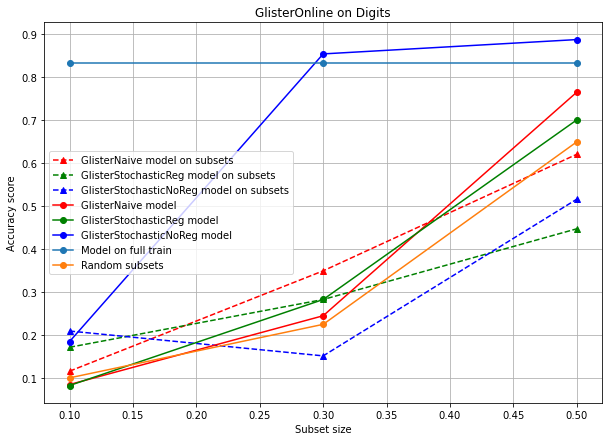

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], glister_naive_subsets_test_acc, label = 'GlisterNaive model on subsets', linestyle = "--", color = "red", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_subsets_test_acc, label = 'GlisterStochasticReg model on subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_subsets_test_acc, label = 'GlisterStochasticNoReg model on subsets', linestyle = "--", color = "blue", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_naive_acc, label = 'GlisterNaive model', color = "red", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_acc, label = 'GlisterStochasticReg model', color = "green", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_acc, label = 'GlisterStochasticNoReg model', color = "blue", marker = "o")
ax.plot([0.1, 0.3, 0.5], [full_train_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], random_subsets_acc, label = 'Random subsets', marker = "o")
#ax.plot([0.1, 0.3, 0.5], [rand_pred_test_acc] * 3, label = 'Random predictions')
plt.grid()
plt.title('GlisterOnline on Digits')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

### Save

In [46]:
data = np.array([glister_naive_subsets_test_acc, glister_stoch_reg_subsets_test_acc, glister_stoch_no_reg_subsets_test_acc, glister_naive_acc, glister_stoch_reg_acc, glister_stoch_no_reg_acc, [full_train_acc[0]]*3, random_subsets_acc])
labels = ['GlisterNaive model on subsets', 'GlisterStochasticReg model on subsets', 'GlisterStochasticNoReg model on subsets', 'GlisterNaive model', 'GlisterStochasticReg model', 'GlisterStochasticNoReg model', 'Model on full train', 'Random subsets']

In [47]:
data = pd.DataFrame(data, index=labels)
data.to_csv("acc_digits_linear", header=None)

In [86]:
np.savetxt('acc_digits_.out', data, delimiter=',') 